#  1.

## Использованные методы OpenMP

1. **`#pragma omp parallel for`**:
   - Используется для распараллеливания цикла.
   - Применяется во всех параллельных методах (`no_reduction_method` и `reduction_method`).

2. **`#pragma omp critical`**:
   - Используется в методе `no_reduction_method` для синхронизации доступа к разделяемым переменным `max_val` и `min_val`.
   - Обеспечивает безопасность данных, но может вызывать значительные затраты времени из-за блокировок.

3. **`#pragma omp parallel for reduction`**:
   - Используется в методе `reduction_method` для эффективной параллельной агрегации значений.
   - Уменьшает накладные расходы синхронизации по сравнению с использованием `critical`.

---

## Анализ результатов

Результаты времени выполнения (в миллисекундах) для различных размеров векторов:

| Размер вектора | Последовательный метод | Без редукции | С редукцией |
|----------------|-------------------------|--------------|-------------|
| 1,000          | 0.00806                | 4.47948      | 0.11162     |
| 10,000         | 0.07228                | 0.44706      | 0.07514     |
| 100,000        | 0.53118                | 2.08786      | 0.19390     |
| 1,000,000      | 5.53804                | 23.2917      | 1.36948     |
| 10,000,000     | 60.8474                | 266.221      | 8.27470     |

### Выводы:
1. **Последовательный метод**:
   - Самый простой, но медленный способ.

2. **Метод без редукции (`no_reduction_method`)**:
   - Медленнее редукции из-за высокой накладной стоимости `critical`.

3. **Метод с редукцией (`reduction_method`)**:
   - Обеспечивает ускорение по сравнению с последовательным методом благодаря уменьшению накладных расходов синхронизации.


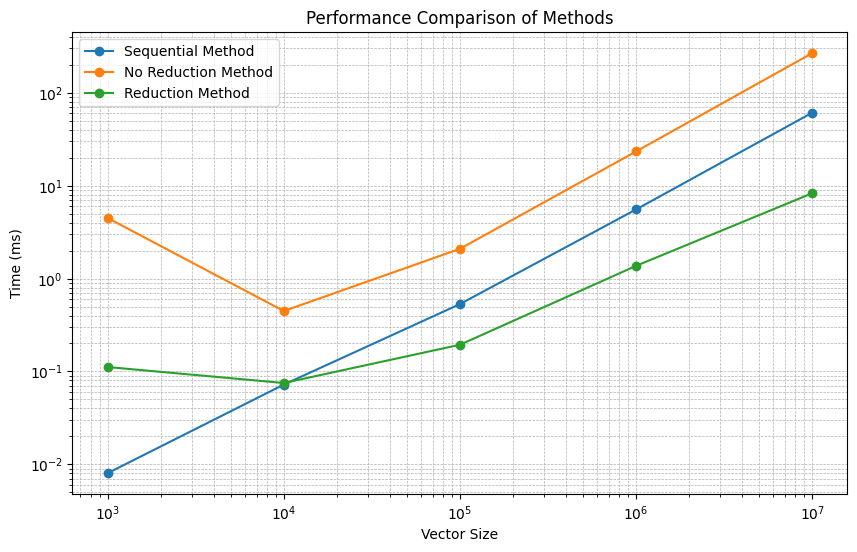

In [3]:
import matplotlib.pyplot as plt

# Data
vector_sizes = [1000, 10000, 100000, 1000000, 10000000]
sequential_times = [0.00806, 0.07228, 0.53118, 5.53804, 60.8474]
no_reduction_times = [4.47948, 0.44706, 2.08786, 23.2917, 266.221]
reduction_times = [0.11162, 0.07514, 0.1939, 1.36948, 8.2747]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(vector_sizes, sequential_times, label="Sequential Method", marker='o')
plt.plot(vector_sizes, no_reduction_times, label="No Reduction Method", marker='o')
plt.plot(vector_sizes, reduction_times, label="Reduction Method", marker='o')

# Log scale for better visualization
plt.xscale('log')
plt.yscale('log')

# Labels and legend
plt.xlabel("Vector Size")
plt.ylabel("Time (ms)")
plt.title("Performance Comparison of Methods")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# 2.

## Использованные методы OpenMP

1. **`#pragma omp parallel for reduction(+:dot_product)`**:
   - Используется для параллельного вычисления скалярного произведения с редукцией.
   - Редукция суммирует результаты вычислений отдельных потоков, минимизируя накладные расходы синхронизации.

---

## Анализ результатов

### Время выполнения (в миллисекундах) для различных размеров векторов

| Размер вектора | Последовательный метод | Параллельный метод с редукцией |
|----------------|-------------------------|--------------------------------|
| 1,000          | 0.00812                | 5.41364                       |
| 10,000         | 0.05956                | 0.1195                        |
| 100,000        | 0.41344                | 0.198                         |
| 1,000,000      | 4.2213                 | 1.1604                        |
| 10,000,000     | 49.3806                | 16.429                        |
| 100,000,000    | 493.506                | 86.0562                       |

---

### Выводы
1. **Последовательный метод**:
   - Простой в реализации, но ограничен в производительности.

2. **Метод с редукцией**:
   - При небольших размерах векторов (например, 1,000 элементов) медленнее из-за накладных расходов на управление потоками.
   - При увеличении размера данных демонстрирует значительное ускорение. Например, при размере вектора 100,000,000 достигается ускорение более чем в 5 раз по сравнению с последовательным методом.

3. **Маленькие данные**:
   - Использование параллельного подхода нецелесообразно для небольших объемов данных из-за накладных расходов.

---

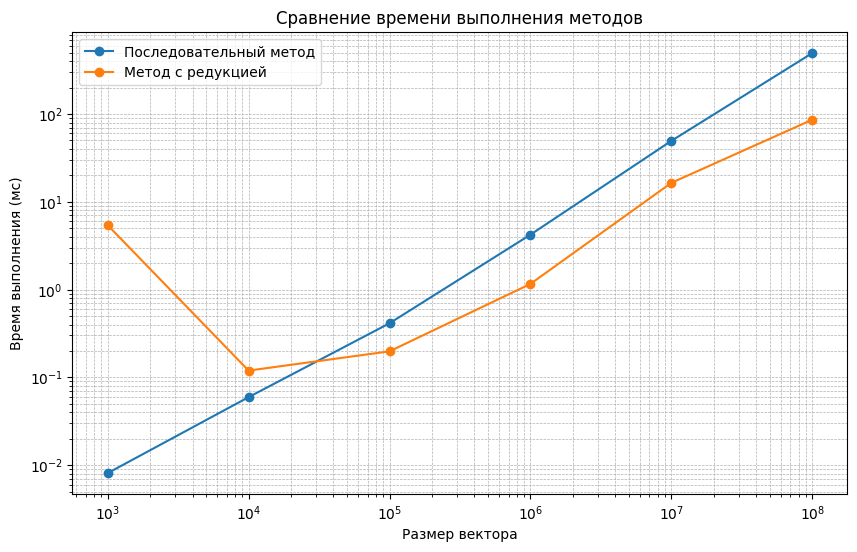

In [2]:
import matplotlib.pyplot as plt

# Данные
vector_sizes = [1000, 10000, 100000, 1000000, 10000000, 100000000]
sequential_times = [0.00812, 0.05956, 0.41344, 4.2213, 49.3806, 493.506]
reduction_times = [5.41364, 0.1195, 0.198, 1.1604, 16.429, 86.0562]

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(vector_sizes, sequential_times, label="Последовательный метод", marker='o')
plt.plot(vector_sizes, reduction_times, label="Метод с редукцией", marker='o')

# Настройки графика
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Размер вектора")
plt.ylabel("Время выполнения (мс)")
plt.title("Сравнение времени выполнения методов")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# 3.

## Использованные методы OpenMP

1. **`#pragma omp parallel for reduction(+:integral)`**:
   - Используется для параллельного вычисления интеграла методом прямоугольников.
   - Редукция позволяет безопасно суммировать результаты вычислений отдельных потоков в одну общую переменную `integral`.

---

## Результаты выполнения

### Таблица времени выполнения (в миллисекундах)

| Пределы интегрирования | Последовательный метод | Параллельный метод |
|-------------------------|------------------------|--------------------|
| [0, 1]                 | 3.76888               | 5.18094           |
| [0, 10]                | 3.68822               | 1.15508           |
| [0, 100]               | 3.82616               | 1.02912           |
| [0, 1000]              | 3.65788               | 1.06856           |
| [0, 10000]             | 3.67974               | 1.05662           |

---

### Выводы

1. **Последовательный метод**:
   - Время выполнения стабильно (~3.7 мс), независимо от пределов интегрирования, так как количество разбиений (`n = 1,000,000`) остается постоянным.

2. **Параллельный метод**:
   - При небольших пределах интегрирования ([0, 1]) параллельный метод медленнее из-за накладных расходов на создание и синхронизацию потоков.
   - При увеличении пределов интегрирования параллельный метод демонстрирует значительное ускорение (примерно в 3-4 раза быстрее последовательного).

3. **Маленькие пределы интегрирования**:
   - Использование параллельного метода нецелесообразно для небольших интервалов из-за высокой стоимости управления потоками.


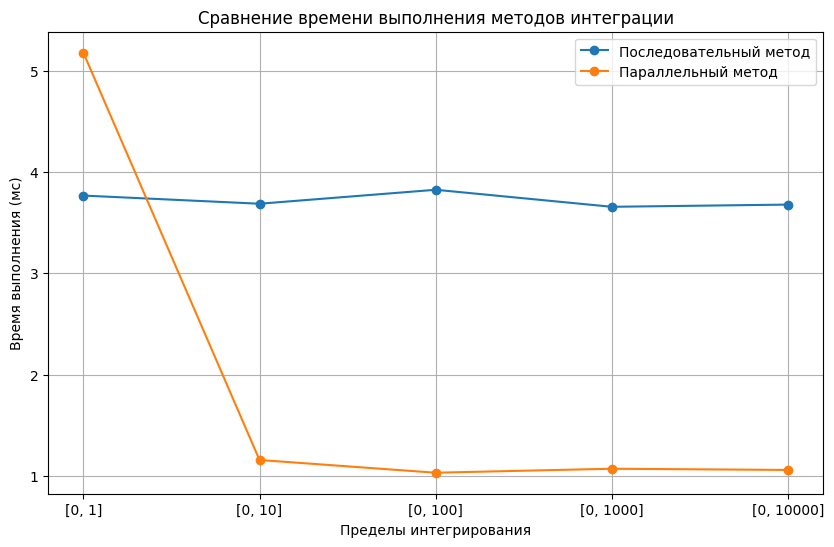

In [4]:
import matplotlib.pyplot as plt

# Данные
integration_limits = ["[0, 1]", "[0, 10]", "[0, 100]", "[0, 1000]", "[0, 10000]"]
sequential_times = [3.76888, 3.68822, 3.82616, 3.65788, 3.67974]
parallel_times = [5.18094, 1.15508, 1.02912, 1.06856, 1.05662]

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(integration_limits, sequential_times, label="Последовательный метод", marker='o')
plt.plot(integration_limits, parallel_times, label="Параллельный метод", marker='o')

# Настройки графика
plt.xlabel("Пределы интегрирования")
plt.ylabel("Время выполнения (мс)")
plt.title("Сравнение времени выполнения методов интеграции")
plt.legend()
plt.grid(True)
plt.show()

# 4.

## Использованные методы OpenMP

1. **`#pragma omp parallel for reduction(max:max_of_mins)`**:
   - Параллелизация основного цикла, проходящего по строкам матрицы.
   - Используется конструкция `reduction(max:max_of_mins)` для безопасного нахождения глобального максимума минимальных значений строк.

---

## Результаты выполнения

### Таблица времени выполнения (в миллисекундах)

| Размер матрицы | Последовательный метод | Параллельный метод |
|----------------|------------------------|--------------------|
| 100            | 0.15556               | 4.47268           |
| 1000           | 7.25064               | 2.79482           |
| 10000          | 762.52                | 136.412           |

---

### Выводы

1. **Последовательный метод**:
   - Время выполнения растет квадратично с увеличением размера матрицы, так как требуется обработать все элементы.

2. **Параллельный метод**:
   - Для небольшой матрицы (100×100) параллельный метод значительно медленнее из-за накладных расходов на создание и синхронизацию потоков.
   - При увеличении размера матрицы параллельный метод показывает значительное ускорение, например:
     - Для матрицы 1000×1000 параллельный метод быстрее в 2.6 раза.
     - Для матрицы 10000×10000 ускорение составляет примерно 5.6 раза.


---

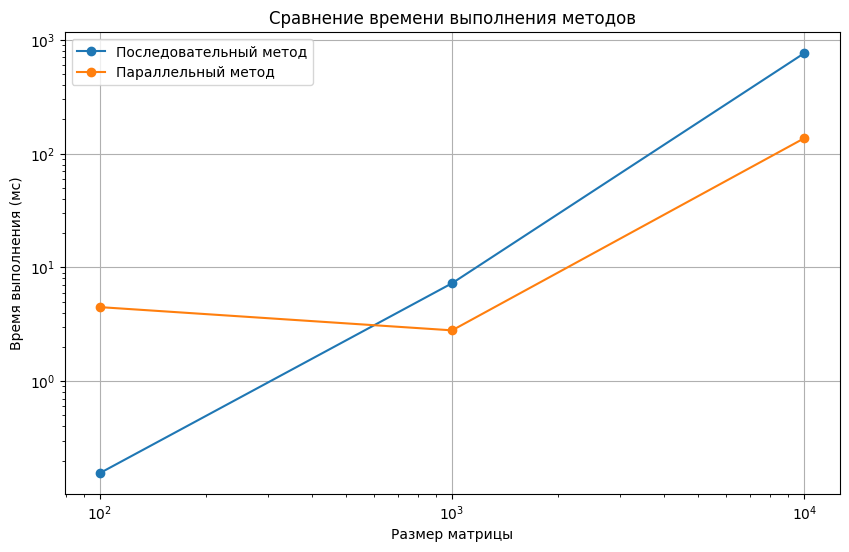

In [ ]:
import matplotlib.pyplot as plt

# Данные
matrix_sizes = [100, 1000, 10000]
sequential_times = [0.15556, 7.25064, 762.52]
parallel_times = [4.47268, 2.79482, 136.412]

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(matrix_sizes, sequential_times, label="Последовательный метод", marker='o')
plt.plot(matrix_sizes, parallel_times, label="Параллельный метод", marker='o')

# Настройки графика
plt.xlabel("Размер матрицы")
plt.ylabel("Время выполнения (мс)")
plt.title("Сравнение времени выполнения методов")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.yscale("log")
plt.show()

# 5.

## Использованные методы OpenMP

1. **`#pragma omp parallel for`**:
   - Используется для параллельного выполнения цикла, где каждая итерация отвечает за обработку одной строки матрицы.

2. **`schedule(runtime)`**:
   - Тип распределения итераций задается во время выполнения программы через `omp_set_schedule`.
   - Тестировались три режима:
     - **static**: статическое распределение итераций (одинаковый объем для каждого потока).
     - **dynamic**: динамическое распределение итераций (потоки получают задания по мере их завершения).
     - **guided**: размер задания уменьшается по мере выполнения.

3. **`reduction(max:max_of_mins)`**:
   - Безопасное объединение частичных результатов от потоков для нахождения глобального максимума.

---

## Результаты выполнения

### Таблица времени выполнения (в миллисекундах)

#### Ленточная матрица
| Размер матрицы | Schedule | Последовательный метод | Параллельный метод |
|----------------|----------|------------------------|--------------------|
| 10             | static   | 0.00212               | 4.25038           |
| 10             | dynamic  | 0.00214               | 0.2231            |
| 10             | guided   | 0.00204               | 0.1208            |
| 100            | static   | 0.1748                | 0.09124           |
| 100            | dynamic  | 0.07254               | 0.09314           |
| 100            | guided   | 0.07952               | 0.10386           |
| 1000           | static   | 8.04856               | 2.1894            |
| 1000           | dynamic  | 7.84602               | 2.51858           |
| 1000           | guided   | 8.32084               | 2.08384           |
| 10000          | static   | 732.064               | 190.409           |
| 10000          | dynamic  | 701.713               | 215.437           |
| 10000          | guided   | 759.252               | 200.478           |

#### Нижнетреугольная матрица
| Размер матрицы | Schedule | Последовательный метод | Параллельный метод |
|----------------|----------|------------------------|--------------------|
| 10             | static   | 0.0018                | 0.08796           |
| 10             | dynamic  | 0.00154               | 0.1696            |
| 10             | guided   | 0.00136               | 0.0958            |
| 100            | static   | 0.0991                | 0.10998           |
| 100            | dynamic  | 0.09032               | 0.13532           |
| 100            | guided   | 0.09182               | 0.10326           |
| 1000           | static   | 7.47456               | 2.34414           |
| 1000           | dynamic  | 7.75778               | 2.16956           |
| 1000           | guided   | 8.31812               | 1.96186           |
| 10000          | static   | 713.919               | 183.075           |
| 10000          | dynamic  | 722.959               | 202.054           |
| 10000          | guided   | 692.635               | 210.097           |

---

## Выводы

   - Режим **`guided`** обеспечивает оптимальный баланс при больших объемах данных, особенно для нерегулярных структур, таких как нижнетреугольные матрицы.

   - Оптимально использовать **`static`** для структурированных матриц и равномерного распределения данных.
    Применять **`guided`** для неравномерных структур или при работе с большим числом потоков.

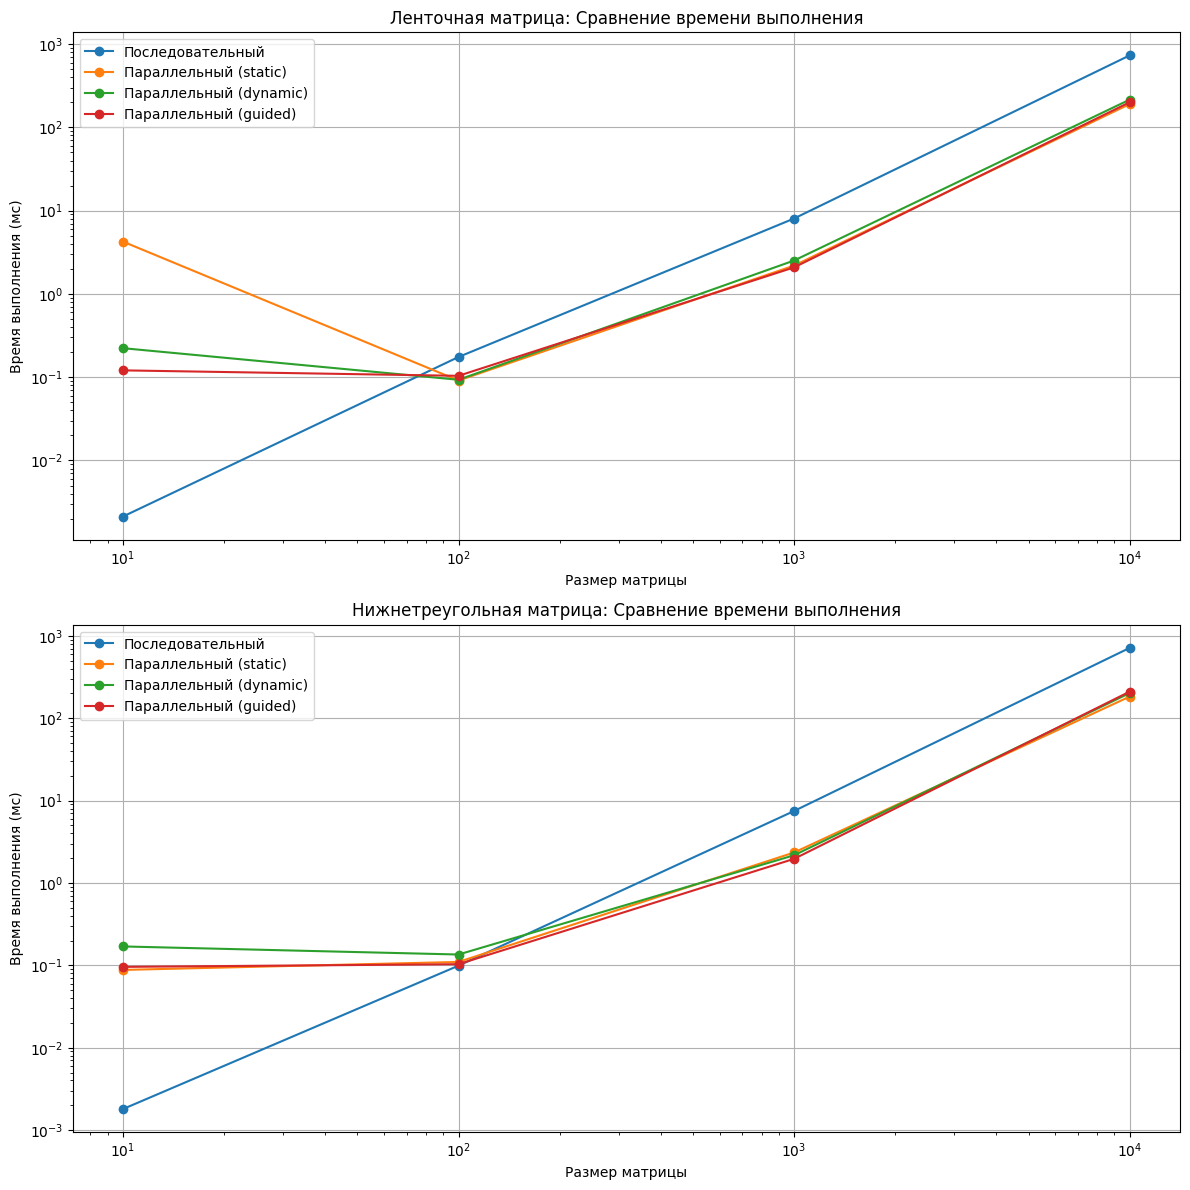

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Данные
matrix_sizes = [10, 100, 1000, 10000]

# Время для ленточной матрицы
seq_band = [0.00212, 0.1748, 8.04856, 732.064]
par_band_static = [4.25038, 0.09124, 2.1894, 190.409]
par_band_dynamic = [0.2231, 0.09314, 2.51858, 215.437]
par_band_guided = [0.1208, 0.10386, 2.08384, 200.478]

# Время для нижнетреугольной матрицы
seq_lower = [0.0018, 0.0991, 7.47456, 713.919]
par_lower_static = [0.08796, 0.10998, 2.34414, 183.075]
par_lower_dynamic = [0.1696, 0.13532, 2.16956, 202.054]
par_lower_guided = [0.0958, 0.10326, 1.96186, 210.097]

# Построение графиков
plt.figure(figsize=(12, 12))

# График для ленточной матрицы
plt.subplot(2, 1, 1)
plt.plot(matrix_sizes, seq_band, label="Последовательный", marker='o')
plt.plot(matrix_sizes, par_band_static, label="Параллельный (static)", marker='o')
plt.plot(matrix_sizes, par_band_dynamic, label="Параллельный (dynamic)", marker='o')
plt.plot(matrix_sizes, par_band_guided, label="Параллельный (guided)", marker='o')
plt.title("Ленточная матрица: Сравнение времени выполнения")
plt.xlabel("Размер матрицы")
plt.ylabel("Время выполнения (мс)")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid()

# График для нижнетреугольной матрицы
plt.subplot(2, 1, 2)
plt.plot(matrix_sizes, seq_lower, label="Последовательный", marker='o')
plt.plot(matrix_sizes, par_lower_static, label="Параллельный (static)", marker='o')
plt.plot(matrix_sizes, par_lower_dynamic, label="Параллельный (dynamic)", marker='o')
plt.plot(matrix_sizes, par_lower_guided, label="Параллельный (guided)", marker='o')
plt.title("Нижнетреугольная матрица: Сравнение времени выполнения")
plt.xlabel("Размер матрицы")
plt.ylabel("Время выполнения (мс)")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


# 6.

## Используемые методы OpenMP

### Применяемые директивы и функции:
1. **`#pragma omp parallel for schedule(runtime)`**
   - Используется для выполнения цикла в параллельном режиме.
   - Тип планирования (`schedule`) задаётся во время выполнения программы через функцию `omp_set_schedule`.

2. **Функция `omp_set_schedule`**
   - Устанавливает тип планирования (`static`, `dynamic`, `guided`).

3. **Режимы планирования:**
   - **`static`**: Итерации распределяются равномерно между потоками заранее.
   - **`dynamic`**: Итерации распределяются потокам по мере их завершения, что полезно для задач с нерегулярной нагрузкой.
   - **`guided`**: Итерации распределяются с уменьшающимся размером чанка, что снижает накладные расходы на планирование.

---

## Анализ времени выполнения

### Результаты:
| Планирование | Время выполнения (последовательное), сек | Время выполнения (параллельное), сек |
|--------------|------------------------------------------|--------------------------------------|
| `static`     | 0.128173                                 | 0.0273414                            |
| `dynamic`    | 0.128861                                 | 0.0288184                            |
| `guided`     | 0.126117                                 | 0.0237274                            |

---

## Выводы

   - `static`:
        Хорошо подходит для задач с равномерной нагрузкой, но не так эффективен при нерегулярной нагрузке.
   - `dynamic`:
        Эффективен при нерегулярной нагрузке, но накладные расходы на управление потоками немного выше.
   - `guided`:
        Оптимален для задач с переменной нагрузкой благодаря динамическому уменьшению размера чанков.

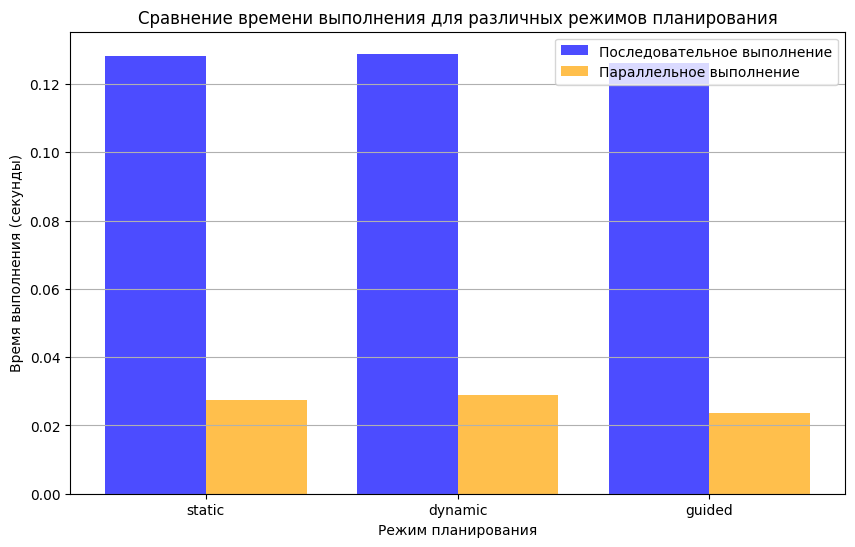

In [ ]:
import matplotlib.pyplot as plt

# Данные
schedules = ["static", "dynamic", "guided"]
sequential_times = [0.128173, 0.128861, 0.126117]
parallel_times = [0.0273414, 0.0288184, 0.0237274]

# Построение графика
x = range(len(schedules))
plt.figure(figsize=(10, 6))
plt.bar(x, sequential_times, width=0.4, label="Последовательное выполнение", color='blue', alpha=0.7)
plt.bar([i + 0.4 for i in x], parallel_times, width=0.4, label="Параллельное выполнение", color='orange', alpha=0.7)

plt.xticks([i + 0.2 for i in x], schedules)
plt.title("Сравнение времени выполнения для различных режимов планирования")
plt.xlabel("Режим планирования")
plt.ylabel("Время выполнения (секунды)")
plt.legend()
plt.grid(axis='y')
plt.show()

# 7.

## Используемые методы OpenMP

### Основные директивы и функции:
1. **Последовательный метод**:
   - Выполняется без использования OpenMP, является базовым для сравнения.

2. **Атомарные операции** (`#pragma omp atomic`):
   - Используется для предотвращения состояния гонки при обновлении переменной.
   - Гарантирует атомарность операции, но может быть медленным из-за частого обращения к памяти.

3. **Критические секции** (`#pragma omp critical`):
   - Сериализует доступ к критическому коду, что предотвращает конфликты потоков.
   - Сильно замедляет выполнение при большом количестве итераций.

4. **Замки**:
   - Используются функции OpenMP (`omp_lock_t`, `omp_set_lock`, `omp_unset_lock`).
   - Полезны для сложных сценариев синхронизации, но могут быть неэффективными для простых операций.

5. **`reduction`**:
   - Выполняет параллельное вычисление суммы с автоматическим объединением результатов из всех потоков.
   - Наиболее оптимальный способ для суммирования, так как снижает накладные расходы на синхронизацию.

---

## Результаты измерений

### Данные:
| Размер вектора | Метод              | Среднее время (мс) |
|----------------|--------------------|--------------------|
| 1000           | Sequential         | 0.00266            |
|                | Atomic             | 3.48998            |
|                | Critical           | 0.08676            |
|                | Lock               | 4.71396            |
|                | Reduction          | 0.05748            |
| 10000          | Sequential         | 0.01848            |
|                | Atomic             | 0.23962            |
|                | Critical           | 0.35802            |
|                | Lock               | 50.6048            |
|                | Reduction          | 0.061              |
| 100000         | Sequential         | 0.17716            |
|                | Atomic             | 2.28016            |
|                | Critical           | 3.0337             |
|                | Lock               | 526.121            |
|                | Reduction          | 0.1226             |
| 1000000        | Sequential         | 1.69               |
|                | Atomic             | 22.8207            |
|                | Critical           | 22.6944            |
|                | Lock               | 5231.23            |
|                | Reduction          | 0.44898            |

---

## Выводы

   - Последовательный метод:
        Быстрее всего для малых размеров векторов, но теряет эффективность при больших данных.

   - reduction:
        Самый быстрый из параллельных методов благодаря минимальным накладным расходам на синхронизацию.
        Подходит для задач суммирования с большими объёмами данных.

   - Атомарные операции:
        Подходят для небольших векторов, но их производительность сильно падает на больших объёмах из-за частого обращения к общей переменной.

   - Критические секции:
        Обеспечивают корректность, но имеют значительные накладные расходы, особенно при увеличении числа итераций.

   - Замки:
        Самый медленный метод, значительно уступающий даже атомарным операциям.
        Следует использовать только при необходимости сложной синхронизации.

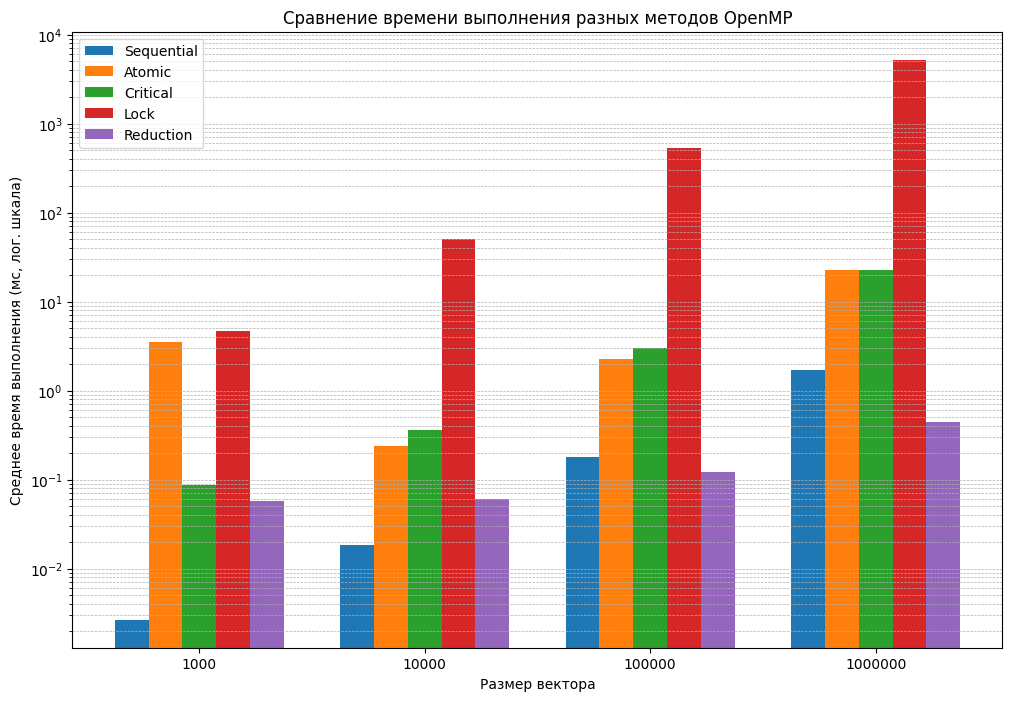

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Данные
sizes = [1000, 10000, 100000, 1000000]
methods = ["Sequential", "Atomic", "Critical", "Lock", "Reduction"]
times = [
    [0.00266, 0.01848, 0.17716, 1.69],        # Sequential
    [3.48998, 0.23962, 2.28016, 22.8207],     # Atomic
    [0.08676, 0.35802, 3.0337, 22.6944],      # Critical
    [4.71396, 50.6048, 526.121, 5231.23],     # Lock
    [0.05748, 0.061, 0.1226, 0.44898]         # Reduction
]

# Логарифмическая шкала
x = np.arange(len(sizes))
width = 0.15
offsets = np.linspace(-width*2, width*2, len(methods))

plt.figure(figsize=(12, 8))

for i, (method, time) in enumerate(zip(methods, times)):
    plt.bar(x + offsets[i], time, width, label=method)

plt.yscale('log')
plt.xticks(x, sizes)
plt.xlabel("Размер вектора")
plt.ylabel("Среднее время выполнения (мс, лог. шкала)")
plt.title("Сравнение времени выполнения разных методов OpenMP")
plt.legend()
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)
plt.show()

# 8.

## Используемые методы OpenMP

1. **Последовательный метод**:
   - Выполнение всех операций (генерация данных и вычисления) в одном потоке без использования OpenMP.
   - Используется как базовый метод для сравнения.

2. **Параллельный метод**:
   - Используется директива `#pragma omp parallel sections` для разделения работы на независимые секции:
     - Генерация данных в одной секции.
     - Вычисление скалярного произведения в другой секции.
   - Используется активное ожидание для синхронизации между секциями.

---

## Результаты измерений

### Данные:
| Размер вектора | Последовательный метод (мс) | Параллельный метод (мс) |
|----------------|-----------------------------|--------------------------|
| 1000           | 0.46606                    | 4.91134                 |
| 10000          | 4.30654                    | 3.92682                 |
| 100000         | 46.6197                    | 46.3265                 |
| 1000000        | 453.41                     | 383.793                 |
| 10000000       | 4272.14                    | 3766.83                 |

---

## Выводы

1. **Для небольших векторов** (1000 элементов):
   - Последовательный метод быстрее параллельного из-за накладных расходов на инициализацию потоков и синхронизацию.

2. **Для средних размеров** (10000–100000 элементов):
   - Производительность методов становится сопоставимой, параллельный метод немного быстрее при увеличении данных.

3. **Для больших данных** (1 000 000–10 000 000 элементов):
   - Параллельный метод значительно выигрывает за счёт эффективного разделения работы между потоками.
   - Последовательный метод теряет производительность из-за больших объёмов вычислений.


---

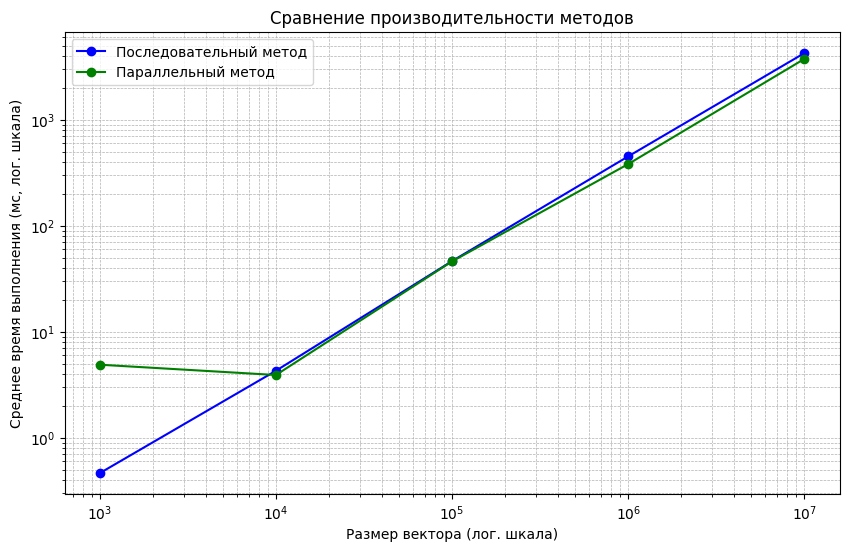

In [ ]:
import matplotlib.pyplot as plt

# Данные
vector_sizes = [1000, 10000, 100000, 1000000, 10000000]
sequential_times = [0.46606, 4.30654, 46.6197, 453.41, 4272.14]
parallel_times = [4.91134, 3.92682, 46.3265, 383.793, 3766.83]

# График
plt.figure(figsize=(10, 6))
plt.plot(vector_sizes, sequential_times, marker='o', label="Последовательный метод", color='blue')
plt.plot(vector_sizes, parallel_times, marker='o', label="Параллельный метод", color='green')

# Настройки графика
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Размер вектора (лог. шкала)")
plt.ylabel("Среднее время выполнения (мс, лог. шкала)")
plt.title("Сравнение производительности методов")
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()

# 9.

## Используемые методы OpenMP

1. **Последовательный метод**:
   - Выполнение всех операций в одном потоке без использования OpenMP.
   - Служит базовым методом для сравнения.

2. **Параллелизм с вложением потоков**:
   - Включено вложение потоков с помощью `omp_set_nested(1)`.
   - Используются следующие директивы:
     - `#pragma omp parallel` — создание общей области параллелизма.
     - `#pragma omp for nowait` — распределение строк матрицы между потоками.
     - `#pragma omp parallel for reduction(min: local_min)` — вложенная параллельная обработка столбцов строки с редукцией для поиска минимума.
     - `#pragma omp critical` — синхронизация обновления глобального максимума.

3. **Параллелизм без вложения потоков**:
   - Вложение потоков отключено с помощью `omp_set_nested(0)`.
   - Используются:
     - `#pragma omp parallel for` — распределение строк матрицы между потоками.
     - `#pragma omp critical` — синхронизация обновления глобального максимума.

---

## Результаты измерений

| Размер матрицы | Последовательный метод (мс) | Параллелизм с вложением (мс) | Параллелизм без вложения (мс) |
|----------------|-----------------------------|------------------------------|-------------------------------|
| 10             | 0.00108                    | 128.305                     | 1.73264                      |
| 100            | 1.58558                    | 1057.65                     | 1.3925                       |
| 1000           | 12.6279                    | 10428.7                     | 3.36772                      |

---

## Анализ

1. **Последовательный метод**:
   - Наименее сложен в реализации, но неэффективен при увеличении размера матрицы.

2. **Параллелизм с вложением потоков**:
   - Существенно проигрывает по производительности из-за накладных расходов на создание вложенных потоков.
   - Редукция (`reduction`) и критическая секция (`critical`) замедляют выполнение из-за высокой степени синхронизации.

3. **Параллелизм без вложения потоков**:
   - Демонстрирует лучшую производительность, особенно на больших матрицах, благодаря меньшим накладным расходам и линейному распределению работы.

---

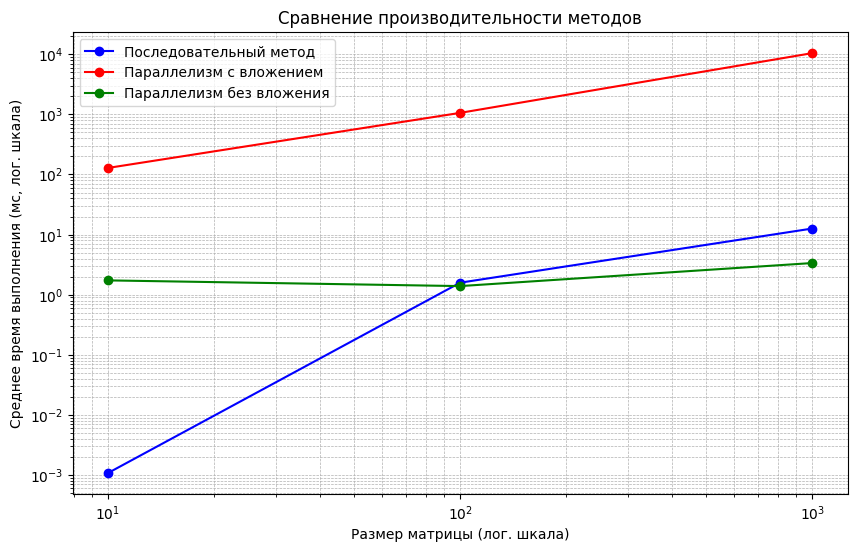

In [ ]:
import matplotlib.pyplot as plt

# Данные
matrix_sizes = [10, 100, 1000]
sequential_times = [0.00108, 1.58558, 12.6279]
nested_times = [128.305, 1057.65, 10428.7]
non_nested_times = [1.73264, 1.3925, 3.36772]

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(matrix_sizes, sequential_times, marker='o', label="Последовательный метод", color='blue')
plt.plot(matrix_sizes, nested_times, marker='o', label="Параллелизм с вложением", color='red')
plt.plot(matrix_sizes, non_nested_times, marker='o', label="Параллелизм без вложения", color='green')

# Настройки графика
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Размер матрицы (лог. шкала)")
plt.ylabel("Среднее время выполнения (мс, лог. шкала)")
plt.title("Сравнение производительности методов")
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()